# RandomForest

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [16]:
data = pd.read_csv('processed_data.csv')

In [17]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [18]:
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Random Forest without over/under sampling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = data.drop('stroke', axis=1)
y = data['stroke']

train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

train_feature_dummy = pd.get_dummies(train_feature, drop_first=True)
test_feature_dummy = pd.get_dummies(test_feature, drop_first=True)

print("##### TRAIN PHASE ####################################")
model = RandomForestClassifier(random_state=0, n_jobs=-1)
    
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10, 15, 20],
    'n_estimators': [10,25,30,50]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring="recall")

grid_search.fit(train_feature_dummy, train_label)
print("GridSearch Best Score(recall): ",grid_search.best_score_)
    
rf_best = grid_search.best_estimator_

print("##### TEST PHASE ####################################")
model = rf_best.fit(train_feature_dummy, train_label)
y_pred = model.predict(test_feature_dummy)
accuracy = model.score(test_feature_dummy, test_label)
print('Accuracy:', accuracy)
data_percentage = 1 - (data.stroke.sum()/len(data.stroke))
print('Naive Model Accuracy:', data_percentage,)
    
f1_score = metrics.f1_score(y_pred, test_label)
print("F1-score: ", f1_score)
    
recall = metrics.recall_score(y_true=test_label, y_pred=y_pred)
print("recall: ", recall)

##### TRAIN PHASE ####################################
Fitting 4 folds for each of 64 candidates, totalling 256 fits
GridSearch Best Score(recall):  0.005952380952380952
##### TEST PHASE ####################################
Accuracy: 0.9572301425661914
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.0
recall:  0.0


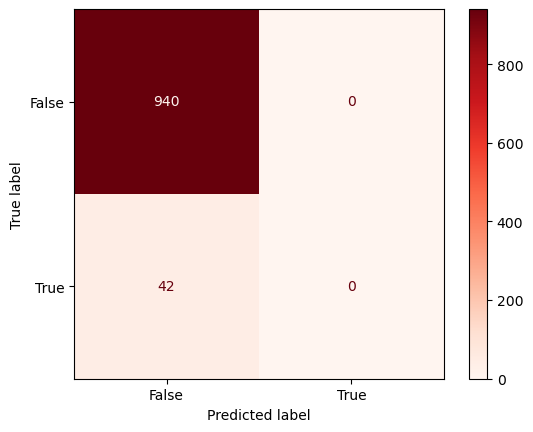

In [20]:
confusion_matrix = metrics.confusion_matrix(test_label, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap=plt.cm.Reds)
plt.show()

## Random Forest with Oversampling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

X = data.drop('stroke', axis=1)
y = data['stroke']

oversampler = RandomOverSampler(random_state=42)

train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

train_feature_dummy = pd.get_dummies(train_feature, drop_first=True)
test_feature_dummy = pd.get_dummies(test_feature, drop_first=True)

train_feature_dummy, train_label = oversampler.fit_resample(train_feature_dummy, train_label)

print("##### TRAIN PHASE ####################################")
model = RandomForestClassifier(random_state=0, n_jobs=-1)
    
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10, 15, 20],
    'n_estimators': [10,25,30,50]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring="recall")

grid_search.fit(train_feature_dummy, train_label)
print("GridSearch Best Score(recall): ",grid_search.best_score_)
    
rf_best = grid_search.best_estimator_

print("##### TEST PHASE ####################################")
model = rf_best.fit(train_feature_dummy, train_label)
y_pred = model.predict(test_feature_dummy)
accuracy = model.score(test_feature_dummy, test_label)
print('Accuracy:', accuracy)
data_percentage = 1 - (data.stroke.sum()/len(data.stroke))
print('Naive Model Accuracy:', data_percentage,)
    
f1_score = metrics.f1_score(y_pred, test_label)
print("F1-score: ", f1_score)
    
recall = metrics.recall_score(y_true=test_label, y_pred=y_pred)
print("recall: ", recall)

##### TRAIN PHASE ####################################
Fitting 4 folds for each of 64 candidates, totalling 256 fits
GridSearch Best Score(recall):  0.9874994335304648
##### TEST PHASE ####################################
Accuracy: 0.8706720977596741
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.22085889570552147
recall:  0.42857142857142855


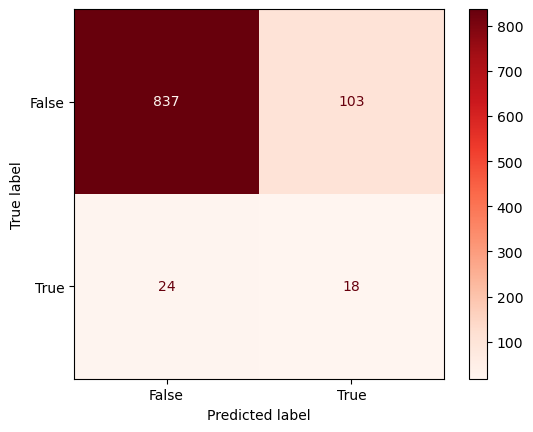

In [22]:
confusion_matrix = metrics.confusion_matrix(test_label, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap=plt.cm.Reds)
plt.show()

## Random Forest with Undersampling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

X = data.drop('stroke', axis=1)
y = data['stroke']

undersampler = RandomUnderSampler(random_state=42)

train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

train_feature_dummy = pd.get_dummies(train_feature, drop_first=True)
test_feature_dummy = pd.get_dummies(test_feature, drop_first=True)

train_feature_dummy, train_label = undersampler.fit_resample(train_feature_dummy, train_label)

print("##### TRAIN PHASE ####################################")
model = RandomForestClassifier(random_state=0, n_jobs=-1)
    
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10, 15, 20],
    'n_estimators': [10,25,30,50]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring="recall")

grid_search.fit(train_feature_dummy, train_label)
print("GridSearch Best Score(recall): ",grid_search.best_score_)
    
rf_best = grid_search.best_estimator_

print("##### TEST PHASE ####################################")
model = rf_best.fit(train_feature_dummy, train_label)
y_pred = model.predict(test_feature_dummy)
accuracy = model.score(test_feature_dummy, test_label)
print('Accuracy:', accuracy)
data_percentage = 1 - (data.stroke.sum()/len(data.stroke))
print('Naive Model Accuracy:', data_percentage,)
    
f1_score = metrics.f1_score(y_pred, test_label)
print("F1-score: ", f1_score)
    
recall = metrics.recall_score(y_true=test_label, y_pred=y_pred)
print("recall: ", recall)

##### TRAIN PHASE ####################################
Fitting 4 folds for each of 64 candidates, totalling 256 fits
GridSearch Best Score(recall):  0.8144599303135889
##### TEST PHASE ####################################
Accuracy: 0.6995926680244399
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.16901408450704222
recall:  0.7142857142857143


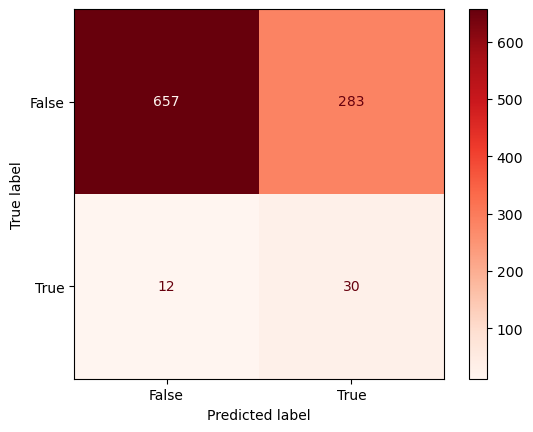

In [24]:
confusion_matrix = metrics.confusion_matrix(test_label, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap=plt.cm.Reds)
plt.show()

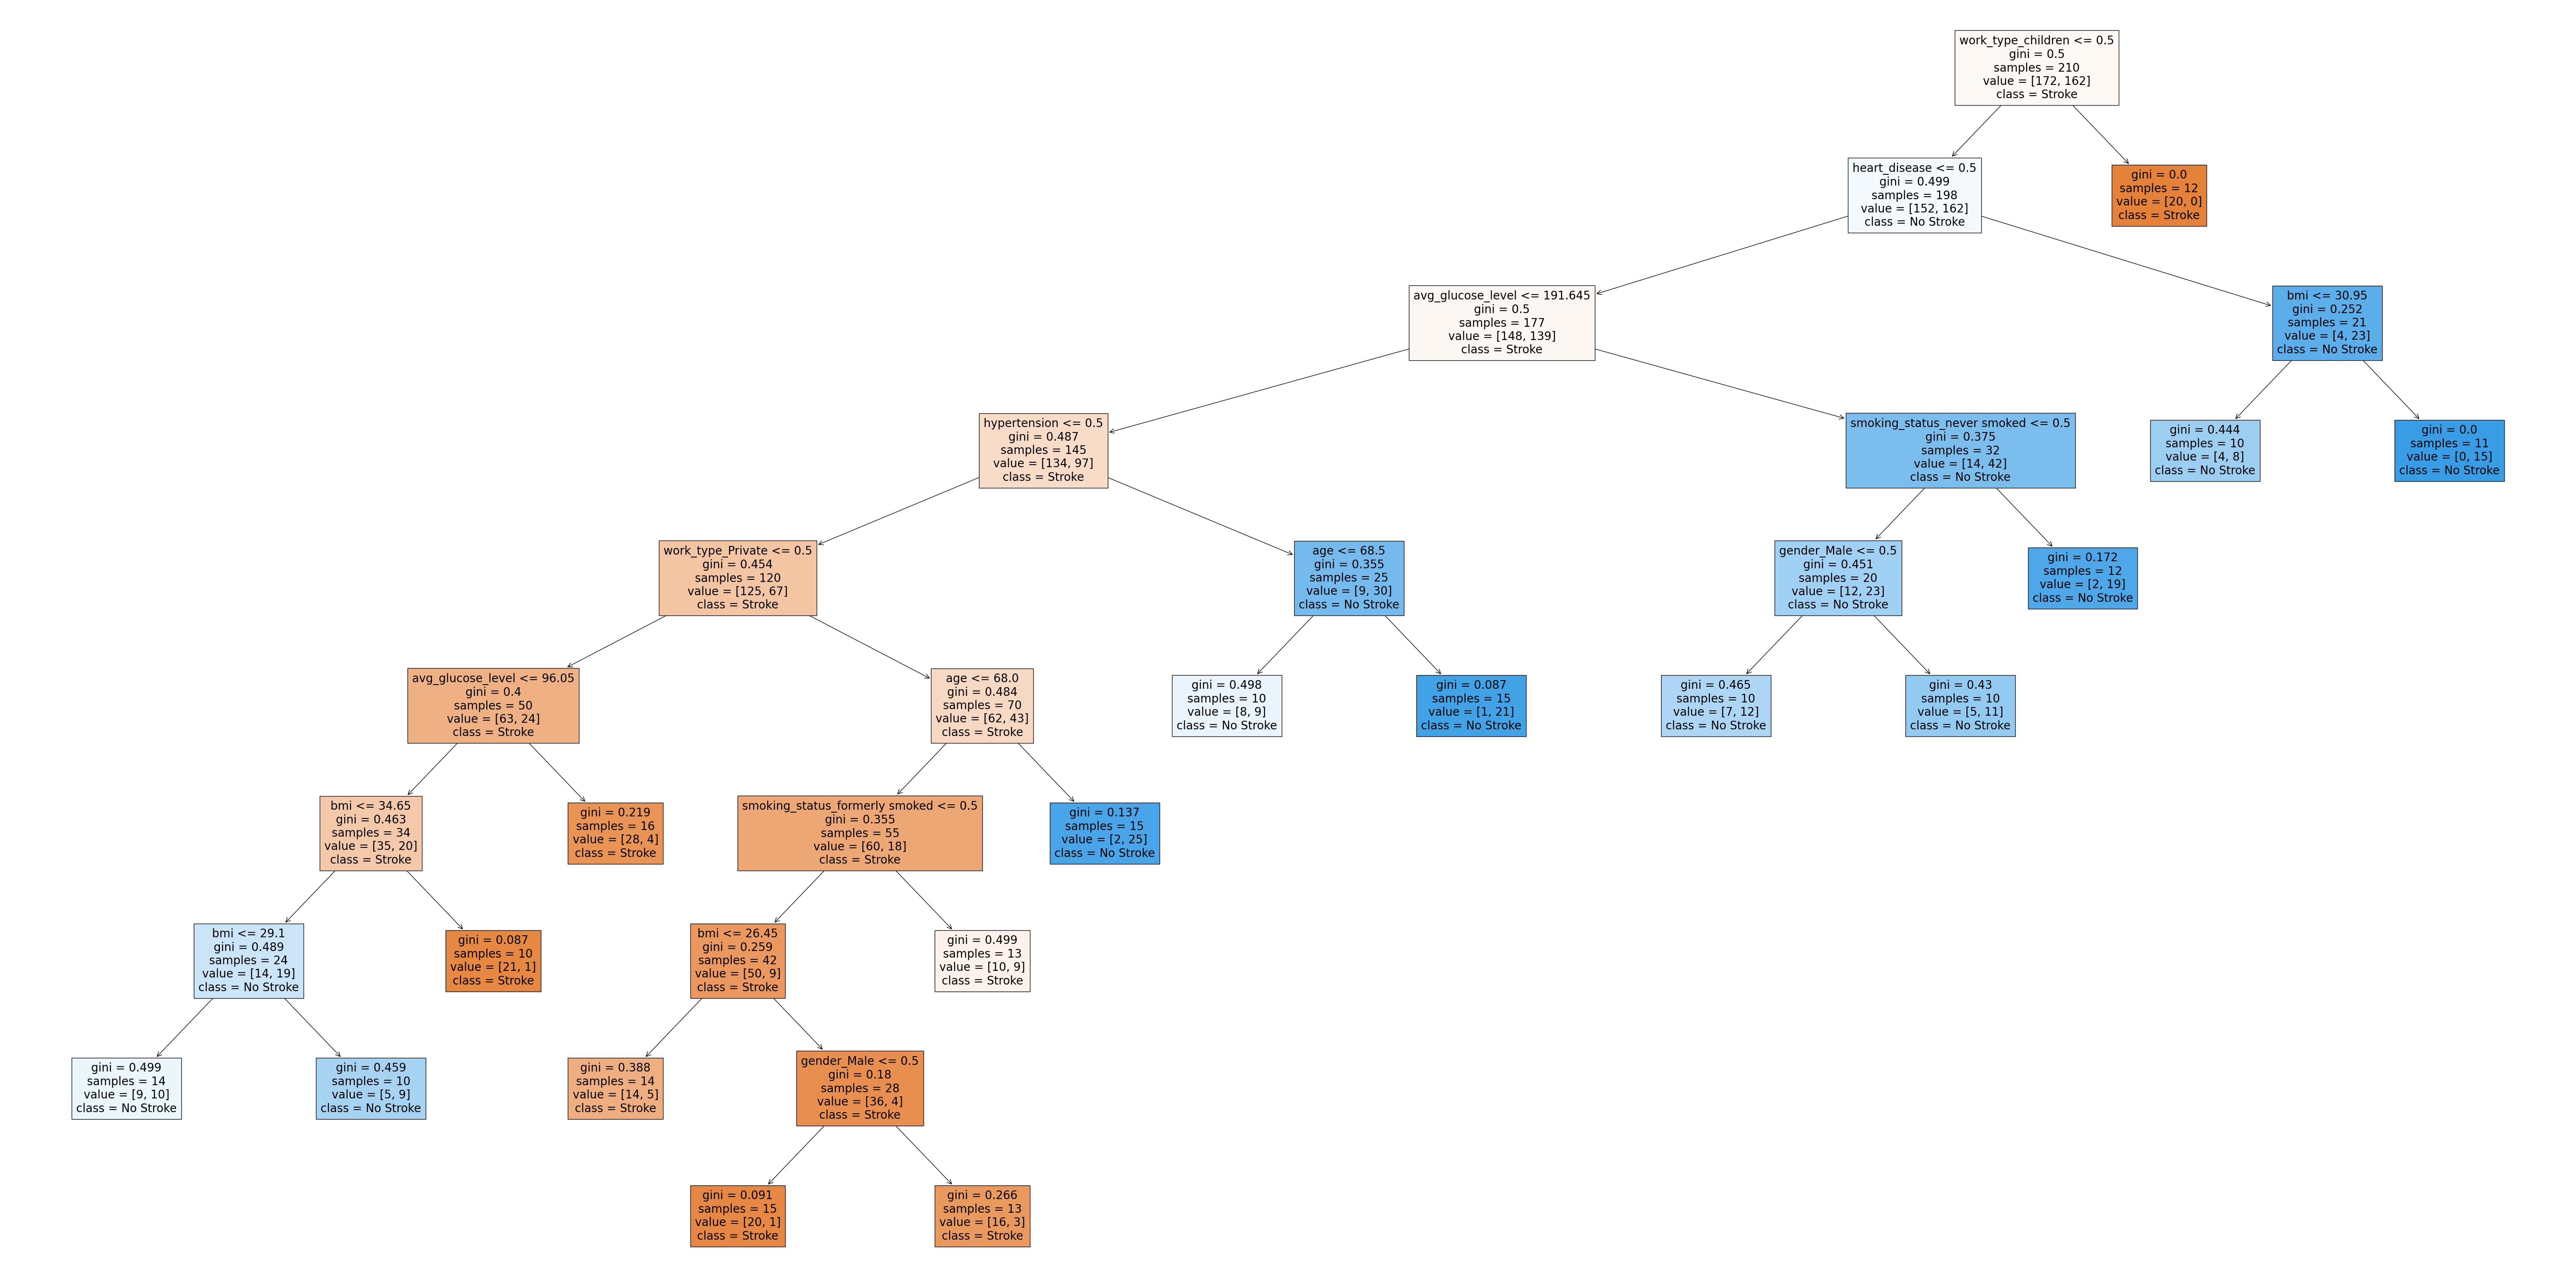

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
grid_search.best_estimator_
plot_tree(grid_search.best_estimator_.estimators_[0], 
          feature_names = train_feature_dummy.columns,
          class_names=['Stroke', "No Stroke"],
          filled=True);

In [14]:
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=30,
                       n_jobs=-1, random_state=0)